### Steps followed:

1) Firstly, I have created a random dummy dataset of 1000 points. Each row in this 1000 row array represents the answers given by a particular user(0 for option 1 and 1 for option 2), their gender and name(I have taken name in the format 'User no').<br>
2) Then, I took random numbers of clusters for K Means and took the cluster number that had the least inertia and distortion via the elbow method. The number of clusters I got was 14.<br>
3) Then, I trained the K Means clustering on this dummy dataset for 14 clusters.I created a dictionary where the keys were the cluster number and the values were the data points in each cluster.I pickled the model, the dataset and the dictionary.<br>
4) In the app.py file, I took the dictionary, the model and dataset. The user will be prompted on the UI to give answers to the questions and asked for their gender. Based on the answerd the model wiil predict a cluster.I will take all the data points belinging to that cluster from the dictionary and give as output the users from this cluster that have a gender opposite to that of the user.<br>
<b> Integrating with flutter app</b><br>
The Flask REST API will be hosted on Heroku and the url will be used in the flutter .dart file with the HTTP package to integrate the flask app with my Flask REST API.

In [11]:
#This function will generate a random dataset of 1000 users for me.
def rand_bin_array(K, N):
    arr = np.zeros(N)
    arr[:K]  = 1
    np.random.shuffle(arr)
    return arr

f=[]
for i in range(1000):
    f.append(list(rand_bin_array(5,10)))


In [13]:
#Assigning gneder to users with 50% probability.
import random
for i in range(1000):
    a=random.random()
    if a<0.5:
        f[i].append('M')
        f[i].append('User'+str(i))
    else:
        f[i].append('F')
        f[i].append('User'+str(i))

In [14]:
f=np.array(f)

In [15]:
from sklearn.cluster import KMeans

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


In [27]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = [2,4,6,8,10,14]

for k in K:
# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(f[:,:-2])

    distortions.append(sum(np.min(cdist(f[:,:-2], kmeanModel.cluster_centers_,'euclidean'), axis=1)) / f.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(f[:,:-2], kmeanModel.cluster_centers_,'euclidean'), axis=1)) / f.shape[0]
    mapping2[k] = kmeanModel.inertia_


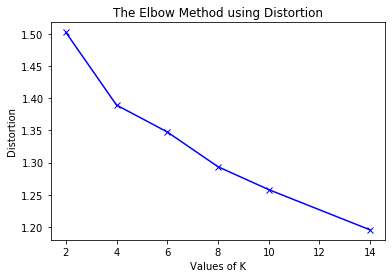

In [28]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


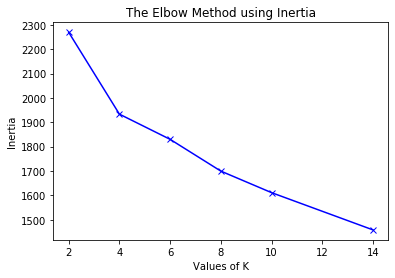

In [29]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [30]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(f[:,:-2])

In [33]:
d={i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

In [35]:
import pickle
dbfile=open('model','ab')
pickle.dump(kmeans,dbfile)
dbfile.close()

In [40]:
dbfile=open('clusters','ab')
pickle.dump(d,dbfile)
dbfile.close()

In [42]:
dbfile=open('users','ab')
pickle.dump(f,dbfile)
dbfile.close()